In [49]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [50]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
X_test.shape

(10000, 28, 28)

In [53]:
single_image= X_train[0]


In [54]:
single_image.shape

(28, 28)

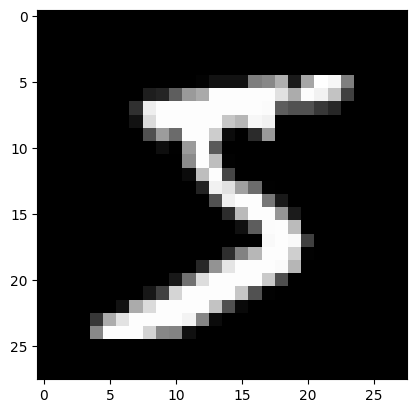

In [55]:
plt.imshow(single_image,cmap='gray')

In [56]:
y_train.shape

(60000,)

In [57]:
X_train.min()

0

In [58]:
X_train.max()

255

In [59]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [60]:
X_train_scaled.min()

0.0

In [61]:
X_train_scaled.max()

1.0

In [62]:
y_train[0]

5

In [63]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [64]:
type(y_train_onehot)

numpy.ndarray

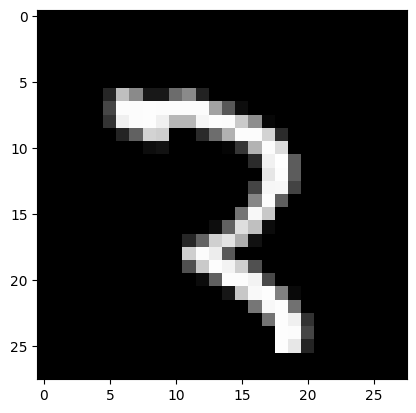

In [65]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [66]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [67]:

X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [68]:
model = keras.Sequential()
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(units=32,activation='relu'))
model.add(layers.Dense(units=10,activation='softmax'))

In [69]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                147488    
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                      

In [70]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [71]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))



Epoch 1/5
938/938 [==============================] - 66s 70ms/step - loss: 0.2078 - accuracy: 0.9379 - val_loss: 0.0719 - val_accuracy: 0.9777
Epoch 2/5
938/938 [==============================] - 62s 66ms/step - loss: 0.0643 - accuracy: 0.9807 - val_loss: 0.0504 - val_accuracy: 0.9835
Epoch 3/5
938/938 [==============================] - 60s 64ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0472 - val_accuracy: 0.9844
Epoch 4/5
938/938 [==============================] - 59s 63ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.0510 - val_accuracy: 0.9850
Epoch 5/5
938/938 [==============================] - 61s 65ms/step - loss: 0.0267 - accuracy: 0.9917 - val_loss: 0.0440 - val_accuracy: 0.9864


In [72]:
metrics = pd.DataFrame(model.history.history)

In [73]:
metrics.head()


,loss,accuracy,val_loss,val_accuracy
0,0.207840,0.937900,0.071901,0.9777
1,0.064282,0.980733,0.050428,0.9835
2,0.044618,0.985817,0.047209,0.9844
3,0.034148,0.989567,0.050995,0.9850
4,0.026679,0.991700,0.044024,0.9864


NIRAUNJANA GAYATHRI G R 212222230096


<Axes: >

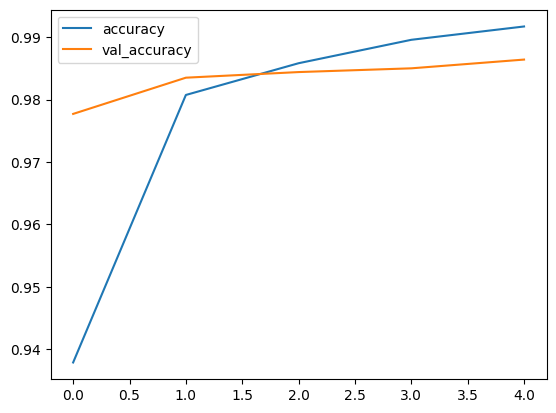

In [74]:
print("NIRAUNJANA GAYATHRI G R 212222230096")
metrics[['accuracy','val_accuracy']].plot()

NIRAUNJANA GAYATHRI G R 212222230096


<Axes: >

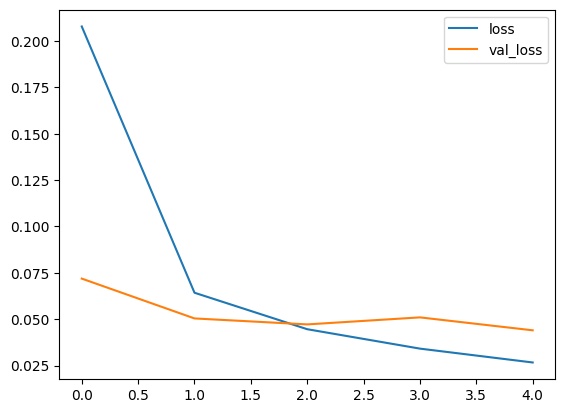

In [75]:
print("NIRAUNJANA GAYATHRI G R 212222230096")
metrics[['loss','val_loss']].plot()

In [76]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 9ms/step


In [77]:

print("NIRAUNJANA GAYATHRI G R 212222230096")
print(confusion_matrix(y_test,x_test_predictions))


NIRAUNJANA GAYATHRI G R 212222230096
[[ 974    0    2    1    0    2    0    0    1    0]
 [   2 1122    2    1    2    0    2    0    4    0]
 [   0    1 1027    1    0    0    0    1    2    0]
 [   0    0    2 1006    0    1    0    0    1    0]
 [   0    0    0    0  976    0    3    0    0    3]
 [   2    0    1   12    0  875    1    0    1    0]
 [   9    2    0    0    3    5  937    0    2    0]
 [   0    1   14    6    2    1    0 1000    2    2]
 [   5    0    2    2    0    0    0    1  963    1]
 [   2    1    1    4    5    5    0    4    3  984]]


In [78]:
print("NIRAUNJANA GAYATHRI G R 212222230096")
print(classification_report(y_test,x_test_predictions))


NIRAUNJANA GAYATHRI G R 212222230096
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.97      1.00      0.98      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [79]:

img = image.load_img('imagefive.jpg')

In [80]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [81]:
img = image.load_img('imagefive.jpg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [82]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [83]:

print(x_single_prediction)

[5]


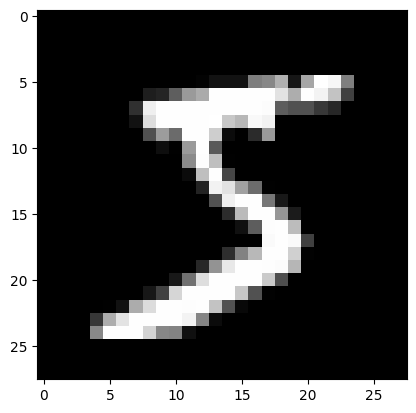

In [84]:

plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [85]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [86]:
print("NIRAUNJANA GAYATHRI G R 212222230096")
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

NIRAUNJANA GAYATHRI G R 212222230096
1/1 [==============================] - 0s 25ms/step


In [87]:
print("NIRAUNJANA GAYATHRI G R 212222230096")
print(x_single_prediction)

NIRAUNJANA GAYATHRI G R 212222230096
[5]
